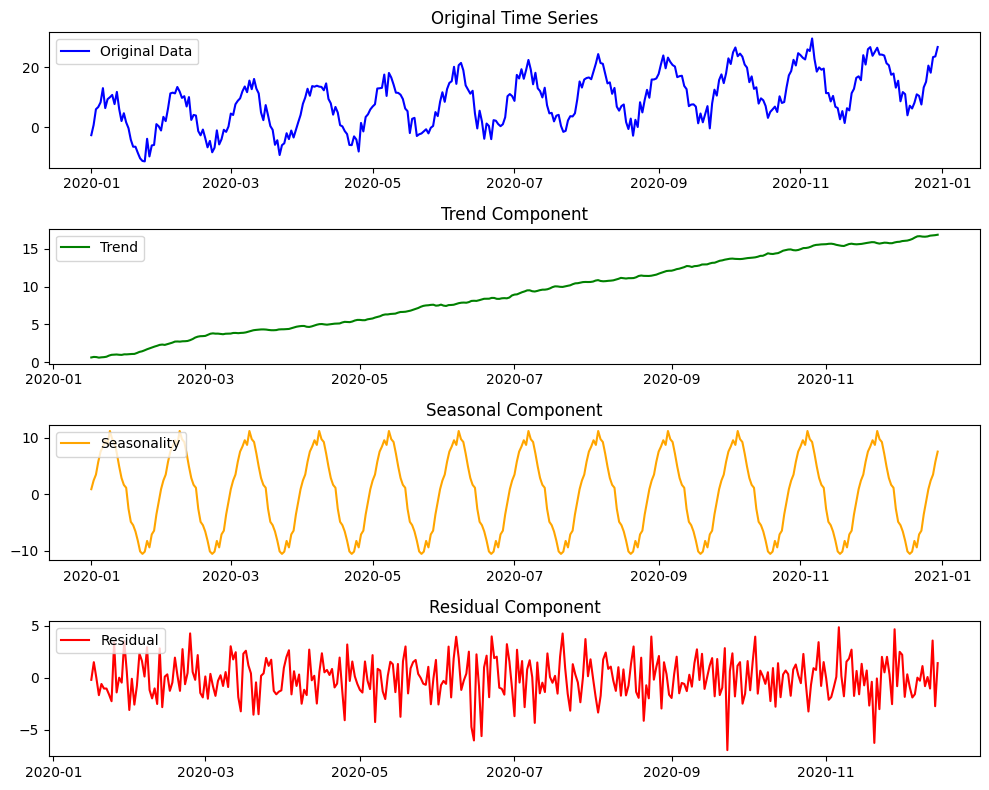

Decomposition Summary:
Trend range: 0.60 to 16.86
Seasonal amplitude (max - min): 21.76


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Step 1: Generate sample time series data (trend + seasonality + noise)
dates = pd.date_range(start='2020-01-01', periods=365, freq='D')
trend = 0.05 * np.arange(365)  # Linear trend
seasonality = 10 * np.sin(2 * np.pi * np.arange(365) / 30)  # Monthly seasonality (approx. 30-day cycle)
noise = np.random.normal(0, 2, 365)  # Random noise
data = pd.DataFrame({
    'Date': dates,
    'Value': trend + seasonality + noise
})
data.set_index('Date', inplace=True)

# Step 2: Check for missing values (optional preprocessing)
data = data.interpolate()  # Interpolate if any NaN values exist

# Step 3: Perform seasonal decomposition (additive model)
period = 30  # Define the seasonal period (e.g., 30 days for monthly seasonality)
decomposition = seasonal_decompose(data['Value'], model='additive', period=period)

# Step 4: Extract components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Step 5: Visualize the decomposition
plt.figure(figsize=(10, 8))

# Original Data
plt.subplot(4, 1, 1)
plt.plot(data.index, data['Value'], label='Original Data', color='blue')
plt.title('Original Time Series')
plt.legend(loc='upper left')

# Trend Component
plt.subplot(4, 1, 2)
plt.plot(data.index, trend, label='Trend', color='green')
plt.title('Trend Component')
plt.legend(loc='upper left')

# Seasonal Component
plt.subplot(4, 1, 3)
plt.plot(data.index, seasonal, label='Seasonality', color='orange')
plt.title('Seasonal Component')
plt.legend(loc='upper left')

# Residual Component
plt.subplot(4, 1, 4)
plt.plot(data.index, residual, label='Residual', color='red')
plt.title('Residual Component')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

# Step 6: Basic analysis
print("Decomposition Summary:")
print(f"Trend range: {trend.min():.2f} to {trend.max():.2f}")
print(f"Seasonal amplitude (max - min): {(seasonal.max() - seasonal.min()):.2f}")